In [3]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as graph_objs
import numpy as np
import geopandas as gpd
from shapely.ops import unary_union
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head()

,District,Total Calls,Emergency Calls,Road Accidents,Medical,Fire,Building Collapse,Crime Incidents,Drowning,Explosion,Misc,Fake Calls,Patients Rescued
0,Lahore,19008571,1024477,474873,438171,29943,1429,25472,984,409,53196,1755,1014268
1,Rawalpindi,6847824,176946,73761,78969,7718,145,5466,216,142,10529,155,191363
2,Faisalabad,9172915,519353,200160,233372,12832,1324,26946,702,130,43887,214,543478
3,Multan,6318038,376382,123717,215388,7231,303,10313,305,57,19068,174,421227
4,Gujranawala,6740694,316323,126572,137369,7602,467,11893,585,256,31579,336,319947


In [4]:
dfg = gpd.read_file('PAK_adm3.geojson')

In [5]:
dfg.head(200)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,1,Bagh,District,District,None,None,"POLYGON ((74.0413436889649 33.79899215698242, ..."
1,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,2,Bhimber,District,District,None,None,"POLYGON ((74.39077758789068 32.8017578125, 74...."
2,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,3,Kotli,District,District,None,None,"POLYGON ((74.01397705078119 33.25094223022472,..."
3,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,4,Mirpur,District,District,None,None,"POLYGON ((73.75380706787104 32.97959136962896,..."
4,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,5,Muzaffarabad,District,District,None,None,"POLYGON ((73.88432312011719 34.06135940551769,..."
5,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,6,Neelum,District,District,None,None,"POLYGON ((74.64798736572266 34.72261810302734,..."
6,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,7,Poonch,District,District,None,None,"POLYGON ((73.99961090087902 33.62478256225597,..."
7,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,8,Sudhnati,District,District,None,None,"POLYGON ((73.55679321289062 33.62844085693365,..."
8,171,PAK,Pakistan,2,Baluchistan,2,Kalat,9,Awaran,District,District,None,None,"POLYGON ((66.2489471435548 26.50770568847656, ..."
9,171,PAK,Pakistan,2,Baluchistan,2,Kalat,10,Disputed Area 1,District,District,None,None,"POLYGON ((66.2489471435548 26.50770568847656, ..."


In [6]:
df_new = dfg[['NAME_1','NAME_2','NAME_3','geometry']]

In [7]:
df_new.rename(columns={'NAME_2':'division','NAME_1':'province','NAME_3':'district'}, inplace=True)

/home/drogon/.local/lib/python3.5/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [8]:
df_new.head()

,province,division,district,geometry
0,Azad Kashmir,Azad Kashmir,Bagh,"POLYGON ((74.0413436889649 33.79899215698242, ..."
1,Azad Kashmir,Azad Kashmir,Bhimber,"POLYGON ((74.39077758789068 32.8017578125, 74...."
2,Azad Kashmir,Azad Kashmir,Kotli,"POLYGON ((74.01397705078119 33.25094223022472,..."
3,Azad Kashmir,Azad Kashmir,Mirpur,"POLYGON ((73.75380706787104 32.97959136962896,..."
4,Azad Kashmir,Azad Kashmir,Muzaffarabad,"POLYGON ((73.88432312011719 34.06135940551769,..."


In [9]:
df_new['province'].unique()

array(['Azad Kashmir', 'Baluchistan', 'F.A.T.A.', 'F.C.T.', 'N.W.F.P.',
       'Northern Areas', 'Punjab', 'Sind'], dtype=object)

In [10]:
df_new['province']=df_new['province'].map({'N.W.F.P.':'KPK','Azad Kashmir':'Azad Kashmir','Baluchistan':'Balochistan',
                                           'F.A.T.A.':'KPK','F.C.T.':'Capital','Punjab':'Punjab','Sind':'Sindh',
                                           'Northern Areas':'Gilgit-Baltistan'})
df_new

/home/drogon/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,province,division,district,geometry
0,Azad Kashmir,Azad Kashmir,Bagh,"POLYGON ((74.0413436889649 33.79899215698242, ..."
1,Azad Kashmir,Azad Kashmir,Bhimber,"POLYGON ((74.39077758789068 32.8017578125, 74...."
2,Azad Kashmir,Azad Kashmir,Kotli,"POLYGON ((74.01397705078119 33.25094223022472,..."
3,Azad Kashmir,Azad Kashmir,Mirpur,"POLYGON ((73.75380706787104 32.97959136962896,..."
4,Azad Kashmir,Azad Kashmir,Muzaffarabad,"POLYGON ((73.88432312011719 34.06135940551769,..."
5,Azad Kashmir,Azad Kashmir,Neelum,"POLYGON ((74.64798736572266 34.72261810302734,..."
6,Azad Kashmir,Azad Kashmir,Poonch,"POLYGON ((73.99961090087902 33.62478256225597,..."
7,Azad Kashmir,Azad Kashmir,Sudhnati,"POLYGON ((73.55679321289062 33.62844085693365,..."
8,Balochistan,Kalat,Awaran,"POLYGON ((66.2489471435548 26.50770568847656, ..."
9,Balochistan,Kalat,Disputed Area 1,"POLYGON ((66.2489471435548 26.50770568847656, ..."


In [11]:
df_punjab = df_new[df_new['province']=='Punjab']
len(df_punjab)

38

In [12]:
df_punjab.to_csv('punjab_districts.csv')

In [47]:
df_districts = df_new[['district','geometry']]
df_districts.head()

,district,geometry
0,Bagh,"POLYGON ((74.0413436889649 33.79899215698242, ..."
1,Bhimber,"POLYGON ((74.39077758789068 32.8017578125, 74...."
2,Kotli,"POLYGON ((74.01397705078119 33.25094223022472,..."
3,Mirpur,"POLYGON ((73.75380706787104 32.97959136962896,..."
4,Muzaffarabad,"POLYGON ((73.88432312011719 34.06135940551769,..."


In [48]:
df_districts.to_file('pak_districts.geojson',driver='GeoJSON')

In [106]:
df_punjab.to_file('punjab_districts.geojson',driver='GeoJSON')

In [83]:
data = graph_objs.Data([
    graph_objs.Scattermapbox(
        lat=['30.3753'],
        lon=['69.3451'],
        mode='markers',  
        text = df_districts['district']
    )
])

layout = dict(
    height=600,
    autosize=True,
    hovermode='closest',
    margin=dict(t=0,r=0,l=0,b=0),
    mapbox=dict(
        layers=[
            dict(
                sourcetype = 'geojson',
                source = 'pak_districts.geojson',
                type = 'fill',
                color = 'rgba(26,188,156 ,1)'
            )
        ],
        accesstoken=''pk.eyJ1IjoiY2hyaWRkeXAiLCJhIjoiRy1GV1FoNCJ9.yUPu7qwD_Eqf_gKNzDrrCQ',
        bearing=0,
        center=dict(
            lat=30.3753,
            lon=69.3451
        ),
        pitch=0,
        zoom=4.5,
        style='light'        
    )
)    

fig = dict(data=data, layout=layout)

/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [84]:
py.plot(fig, filename='pak-districts.html')

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.mapbox.Layer: 'text'

    Valid properties:
        below
            Determines if the layer will be inserted before the
            layer with the specified ID. If omitted or set to '',
            the layer will be inserted above every existing layer.
        circle
            plotly.graph_objs.layout.mapbox.layer.Circle instance
            or dict with compatible properties
        color
            Sets the primary layer color. If `type` is *circle*,
            color corresponds to the circle color If `type` is
            *line*, color corresponds to the line color If `type`
            is *fill*, color corresponds to the fill color If
            `type` is *symbol*, color corresponds to the icon color
        fill
            plotly.graph_objs.layout.mapbox.layer.Fill instance or
            dict with compatible properties
        line
            plotly.graph_objs.layout.mapbox.layer.Line instance or
            dict with compatible properties
        opacity
            Sets the opacity of the layer.
        source
            Sets the source data for this layer. Source can be
            either a URL, a geojson object (with `sourcetype` set
            to *geojson*) or an array of tile URLS (with
            `sourcetype` set to *vector*).
        sourcelayer
            Specifies the layer to use from a vector tile source.
            Required for *vector* source type that supports
            multiple layers.
        sourcetype
            Sets the source type for this layer. Support for
            *raster*, *image* and *video* source types is coming
            soon.
        symbol
            plotly.graph_objs.layout.mapbox.layer.Symbol instance
            or dict with compatible properties
        type
            Sets the layer type. Support for *raster*, *background*
            types is coming soon. Note that *line* and *fill* are
            not compatible with Point GeoJSON geometries.
        

In [101]:
for col in df_districts.columns:
    df_districts[col] = df_districts[col].astype(str)

/home/drogon/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [99]:
df_districts.dtypes

district    object
geometry    object
dtype: object

In [277]:
df = pd.read_csv('punjab_population.csv')
dfg = gpd.read_file('punjab_districts.geojson',driver='GeoJSON')

In [278]:
df_gujranwala_rows = dfg[dfg['district'].str.contains('Gujranwala')]
df_narowal_rows = dfg[dfg['district'].str.contains('Narowal')]
df_okara_rows = dfg[dfg['district'].str.contains('Okara')]
df_gujrat_rows = dfg[dfg['district'].str.contains('rat')]

In [279]:
polygons = [df_gujranwala_rows.iloc[0, df_gujranwala_rows.columns.get_loc("geometry")],
            df_gujranwala_rows.iloc[1, df_gujranwala_rows.columns.get_loc("geometry")]]
boundary_gujranwala = unary_union(polygons)

polygons = [df_narowal_rows.iloc[0, df_narowal_rows.columns.get_loc("geometry")],
            df_narowal_rows.iloc[1, df_narowal_rows.columns.get_loc("geometry")]]
boundary_narowal = unary_union(polygons)

polygons = [df_okara_rows.iloc[0, df_okara_rows.columns.get_loc("geometry")],
            df_okara_rows.iloc[1, df_okara_rows.columns.get_loc("geometry")]]
boundary_okara = unary_union(polygons)

polygons = [df_gujrat_rows.iloc[0, df_gujrat_rows.columns.get_loc("geometry")],
            df_gujrat_rows.iloc[1, df_gujrat_rows.columns.get_loc("geometry")]]
boundary_gujrat = unary_union(polygons)

In [280]:
# before moving forward let's delete the rows containing old coordinates.
dfg = dfg[dfg.district != 'Gujranwala 1']
dfg = dfg[dfg.district != 'Gujranwala 2']
dfg = dfg[dfg.district != 'Narowal 1']
dfg = dfg[dfg.district != 'Narowal 2']
dfg = dfg[dfg.district != 'Gujrat']
dfg = dfg[dfg.district != 'Gujarat']
dfg = dfg[dfg.district != 'Okara 1']
dfg = dfg[dfg.district != 'Okara']

In [281]:
df_gujranwala = pd.DataFrame([['Punjab', 'Gujranwala', 'Gujranwala', boundary_gujranwala]],
                      columns=['province', 'division', 'district', 'geometry'])
dfg = dfg.append(df_gujranwala, ignore_index=True)

df_narowal = pd.DataFrame([['Punjab', 'Gujranwala', 'Narowal', boundary_narowal]],
                      columns=['province', 'division', 'district', 'geometry'])
dfg = dfg.append(df_narowal, ignore_index=True)

df_okara = pd.DataFrame([['Punjab', 'Lahore', 'Okara', boundary_okara]],
                      columns=['province', 'division', 'district', 'geometry'])
dfg = dfg.append(df_okara, ignore_index=True)

df_gujrat = pd.DataFrame([['Punjab', 'Gujranwala', 'Gujrat', boundary_gujrat]],
                      columns=['province', 'division', 'district', 'geometry'])
dfg = dfg.append(df_gujrat, ignore_index=True)

In [290]:
dfg.sort_values('division',inplace=True)
dfg.reset_index(drop=True,inplace=True)

In [291]:
dfg

,province,division,district,geometry
0,Punjab,Bahawalpur,Bahawalnagar,"POLYGON ((72.78970336914062 28.96686172485363,..."
1,Punjab,Bahawalpur,Bahawalpur,"POLYGON ((71.89630126953125 27.95684051513683,..."
2,Punjab,Bahawalpur,Rahim Yar Khan,"POLYGON ((71.12506103515636 27.79225158691401,..."
3,Punjab,Dera Ghazi Khan,Dera Ghazi Khan,"POLYGON ((70.80436706542974 30.66216278076178,..."
4,Punjab,Dera Ghazi Khan,Layyah,"POLYGON ((71.75096893310547 31.15443420410162,..."
5,Punjab,Dera Ghazi Khan,Muzaffargarh,"POLYGON ((70.88983917236334 29.19815254211437,..."
6,Punjab,Dera Ghazi Khan,Rajanpur,"POLYGON ((69.73097229003918 28.38611793518066,..."
7,Punjab,Faisalabad,Toba Tek Singh,"POLYGON ((72.81320190429693 30.70860671997076,..."
8,Punjab,Faisalabad,Jhang,"POLYGON ((71.75096893310547 31.15443420410162,..."
9,Punjab,Faisalabad,Faisalabad,"POLYGON ((73.34368133544933 31.01161575317383,..."


In [288]:
dfg.iloc[17,1]='Sahiwal'
dfg.iloc[22,1]='Sahiwal'
dfg.iloc[25,1]='Sahiwal'

In [302]:
dfg.to_file('punjab_districts_updated.geojson',driver='GeoJSON')
dfg.to_csv('punjab_districts_updated.csv', index=False)

In [303]:
df_merged=dfg.merge(df, how='left', on='district')
df_merged

,province,division,district,geometry,area,population,density
0,Punjab,Bahawalpur,Bahawalnagar,"POLYGON ((72.78970336914062 28.96686172485363,...",8878,2981919,336
1,Punjab,Bahawalpur,Bahawalpur,"POLYGON ((71.89630126953125 27.95684051513683,...",24830,3668106,148
2,Punjab,Bahawalpur,Rahim Yar Khan,"POLYGON ((71.12506103515636 27.79225158691401,...",11880,4814006,405
3,Punjab,Dera Ghazi Khan,Dera Ghazi Khan,"POLYGON ((70.80436706542974 30.66216278076178,...",11922,2872201,241
4,Punjab,Dera Ghazi Khan,Layyah,"POLYGON ((71.75096893310547 31.15443420410162,...",6291,1824230,290
5,Punjab,Dera Ghazi Khan,Muzaffargarh,"POLYGON ((70.88983917236334 29.19815254211437,...",8249,4322009,524
6,Punjab,Dera Ghazi Khan,Rajanpur,"POLYGON ((69.73097229003918 28.38611793518066,...",12319,1995958,162
7,Punjab,Faisalabad,Toba Tek Singh,"POLYGON ((72.81320190429693 30.70860671997076,...",3252,2190015,673
8,Punjab,Faisalabad,Jhang,"POLYGON ((71.75096893310547 31.15443420410162,...",8809,2743416,311
9,Punjab,Faisalabad,Faisalabad,"POLYGON ((73.34368133544933 31.01161575317383,...",5856,7873910,1345


In [304]:
df_merged.to_file('punjab_districts(area_pop_den).geojson',driver='GeoJSON')
df_merged.to_csv('punjab_districts(area_pop_den).csv',index=False)

In [295]:
li = list(df_merged.division.unique())

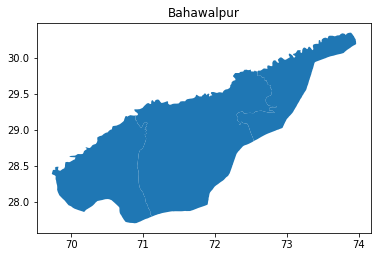

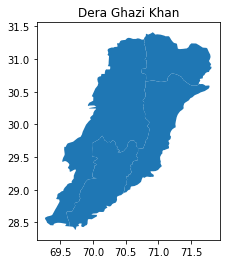

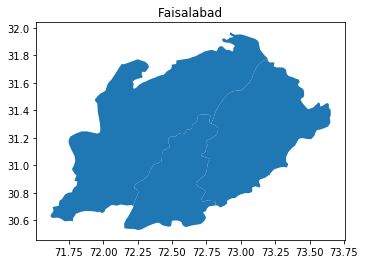

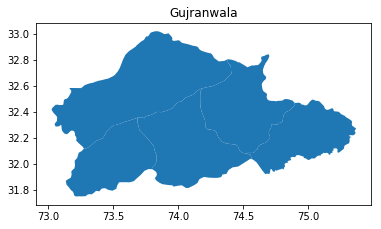

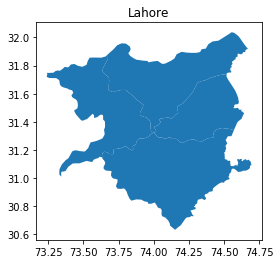

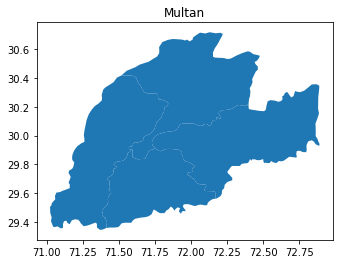

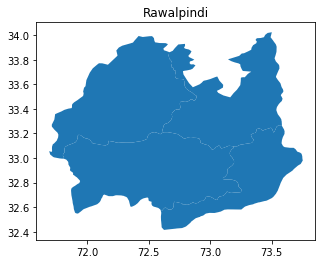

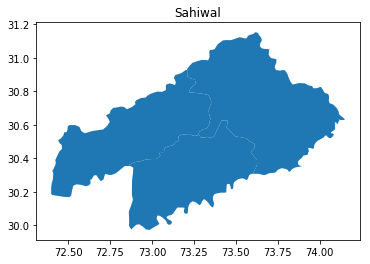

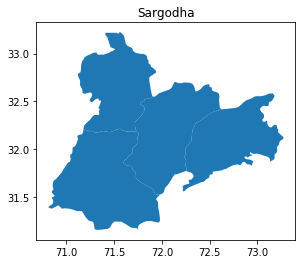

In [297]:
for division in li:
    df_merged[df_merged['division']==division].plot()
    plt.title(division)